<a href="https://colab.research.google.com/github/rhy004/Sampling/blob/main/Sampling_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore",category=ConvergenceWarning)

In [3]:
df=pd.read_csv("/content/Creditcard_data.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


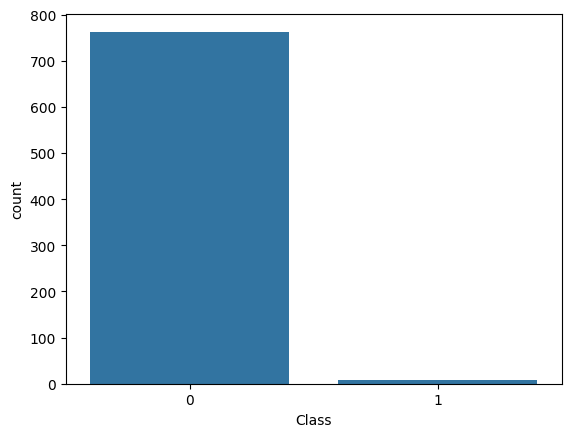

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class',data=df)
plt.show()

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [7]:
X = df.drop("Class", axis=1)
y = df["Class"]

rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)
bs = BorderlineSMOTE(random_state = 42)
ad = ADASYN(random_state=42)

In [8]:
X_rus, y_rus = rus.fit_resample(X, y)
df_rus = pd.concat([X_rus, y_rus], axis=1)
df_rus.to_csv("data_rus.csv", index=False)

X_ros, y_ros = ros.fit_resample(X, y)
df_ros = pd.concat([X_ros, y_ros], axis=1)
df_ros.to_csv("data_ros.csv", index=False)

X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.concat([X_smote, y_smote], axis=1)
df_smote.to_csv("data_smote.csv", index=False)

X_bs, y_bs = bs.fit_resample(X, y)
df_bs = pd.concat([X_bs, y_bs], axis=1)
df_bs.to_csv("data_bs.csv", index=False)

X_ad, y_ad = ad.fit_resample(X, y)
df_ad = pd.concat([X_ad, y_ad], axis=1)
df_ad.to_csv("data_ad.csv", index=False)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
datasets=["/content/data_ros.csv","/content/data_rus.csv",
          "/content/data_smote.csv","/content/data_bs.csv",
          "/content/data_ad.csv"]

In [11]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),
         SVC(),GradientBoostingClassifier()]

sampling = ['RandomUnderSampler','RandomOverSampler','SMOTE','BorderlineSMOTE','ADASYN']

In [12]:
results = []

for dataset,sampling_technique in zip(datasets,sampling):
    df = pd.read_csv(dataset)
    X = df.drop("Class",axis = 1)
    y = df["Class"]

    for model,model_name in zip(models,['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'GradientBoostingClassifier']):
        X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
        model.fit(X_train,Y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test,y_pred)
        results.append({'Sampling':sampling_technique,'Classifier':model_name,'Accuracy':100*accuracy})

results_df = pd.DataFrame(results)

In [14]:
results_df.head(10)

,Sampling,Classifier,Accuracy
0,RandomUnderSampler,LogisticRegression,91.830065
1,RandomUnderSampler,DecisionTreeClassifier,99.346405
2,RandomUnderSampler,RandomForestClassifier,100.000000
3,RandomUnderSampler,SVC,66.993464
4,RandomUnderSampler,GradientBoostingClassifier,100.000000
5,RandomOverSampler,LogisticRegression,25.000000
6,RandomOverSampler,DecisionTreeClassifier,75.000000
7,RandomOverSampler,RandomForestClassifier,25.000000
8,RandomOverSampler,SVC,0.000000
9,RandomOverSampler,GradientBoostingClassifier,75.000000


In [15]:
final = results_df.pivot_table(index='Classifier', columns='Sampling', values='Accuracy')
final.to_csv('final_result.csv')

In [18]:
final.head()

Sampling,ADASYN,BorderlineSMOTE,RandomOverSampler,RandomUnderSampler,SMOTE
Classifier,,,,,
DecisionTreeClassifier,97.712418,99.346405,75.0,99.346405,98.039216
GradientBoostingClassifier,98.366013,99.346405,75.0,100.000000,99.019608
LogisticRegression,92.483660,98.692810,25.0,91.830065,91.176471
RandomForestClassifier,99.019608,100.000000,25.0,100.000000,99.346405
SVC,66.993464,83.660131,0.0,66.993464,68.627451
